In [2]:
!pip install nfl_data_py

import nfl_data_py as nfl
import pandas as pd

df = nfl.import_weekly_data([2024], downcast=True)
df.head(), df.shape

# Check the column names
df.columns.tolist()

Downcasting floats.


['player_id',
 'player_name',
 'player_display_name',
 'position',
 'position_group',
 'headshot_url',
 'recent_team',
 'season',
 'week',
 'season_type',
 'opponent_team',
 'completions',
 'attempts',
 'passing_yards',
 'passing_tds',
 'interceptions',
 'sacks',
 'sack_yards',
 'sack_fumbles',
 'sack_fumbles_lost',
 'passing_air_yards',
 'passing_yards_after_catch',
 'passing_first_downs',
 'passing_epa',
 'passing_2pt_conversions',
 'pacr',
 'dakota',
 'carries',
 'rushing_yards',
 'rushing_tds',
 'rushing_fumbles',
 'rushing_fumbles_lost',
 'rushing_first_downs',
 'rushing_epa',
 'rushing_2pt_conversions',
 'receptions',
 'targets',
 'receiving_yards',
 'receiving_tds',
 'receiving_fumbles',
 'receiving_fumbles_lost',
 'receiving_air_yards',
 'receiving_yards_after_catch',
 'receiving_first_downs',
 'receiving_epa',
 'receiving_2pt_conversions',
 'racr',
 'target_share',
 'air_yards_share',
 'wopr',
 'special_teams_tds',
 'fantasy_points',
 'fantasy_points_ppr']

### "Who were the top 10 quarterbacks by total passing yards in the 2024 season?"

In [3]:
# Filter to only quarterbacks
qbs = df[df['position'] == 'QB']

# Group by player and sum total passing yards
qb_passing = qbs.groupby('player_name')['passing_yards'].sum().reset_index()

# Sort by most passing yards
qb_passing_sorted = qb_passing.sort_values(by='passing_yards', ascending=False)

# Show top 10
qb_passing_sorted.head(10)

,player_name,passing_yards
37,J.Goff,4942.0
31,J.Burrow,4918.0
5,B.Mayfield,4685.0
61,P.Mahomes,4607.0
51,L.Jackson,4601.0
63,S.Darnold,4564.0
32,J.Daniels,4390.0
28,J.Allen,4367.0
26,G.Smith,4320.0
56,M.Stafford,4295.0


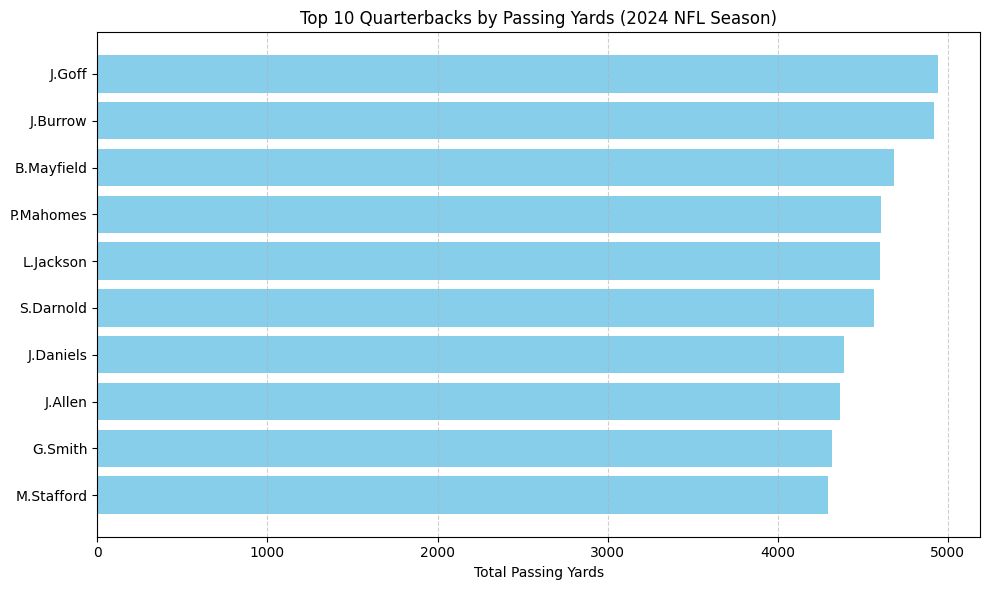

In [4]:
import matplotlib.pyplot as plt

# Get top 10 QBs
top_qbs = qb_passing_sorted.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_qbs['player_name'], top_qbs['passing_yards'], color='skyblue')
plt.xlabel('Total Passing Yards')
plt.title('Top 10 Quarterbacks by Passing Yards (2024 NFL Season)')
plt.gca().invert_yaxis()  # Highest value on top
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()